In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam

from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

# Seed for reproducibility
seed = 42
np.random.seed(seed)

In [3]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Checking missing values
train.isnull().any().sum()

0

In [8]:
test.isnull().any().sum()

0

In [9]:
X = train.iloc[:, 1:]
y = train.iloc[:, 0]

In [10]:
# Reshaping data into images and suitable for CNN matrixes (np.ndarray)

X = X.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [11]:
def normalize(arr): 
    return (arr - np.mean(arr)) / np.std(arr)

In [12]:
X = normalize(X)
test = normalize(test)

In [13]:
# Sanity check
mean, std = np.mean(X), np.std(X)
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))

Mean: 0.000, Standard Deviation: 1.000


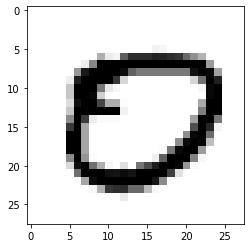

In [14]:
# Showing random digit
plt.imshow(X[np.random.randint(0, len(X)), :, :, 0], cmap='binary');

In [15]:
# Image augmentation generator 
datagen = ImageDataGenerator(
            rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 20)
            zoom_range = 0.1, # Randomly zoom image 
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False, 
            vertical_flip=False)  

In [16]:
# Train/test split to augment only training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [17]:
# fitting a generator
datagen.fit(X_train)

In [18]:
# OHE output - encoding 10 different digits 

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [19]:
# Buildng CNN in Keras 

model = Sequential()

# Stage 1
# Adding two convolutions
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
# Adding pooling layer to reduce number of input params 
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'))

# Stage 2 
# Adding similar Conv + Norm + MaxPool layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'))

# Stage 3-4
# Adding a copy of previous Conv + MaxPool layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'))

# Converting our matrix to 1-D set of features 
model.add(Flatten())


# Stage-5 
# Adding fully-conected layers
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

# Adding output softmax layer for multilabel classification
model.add(Dense(10, activation='softmax'))

In [20]:
# Adding optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999) # beta-1 and beta-2 are "no brainers" - Andrew Ng 

In [21]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [22]:
# Including learning rate decay - so to prevent overfitting
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [23]:
# Defining model parameters 
batch_size = 64
epochs = 50

In [24]:
# Fitting the model
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (X_test, y_test), verbose=1, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/50
557/557 [==============================] - 12s 22ms/step - loss: 0.2042 - categorical_accuracy: 0.9389 - val_loss: 0.0650 - val_categorical_accuracy: 0.9789
Epoch 2/50
557/557 [==============================] - 12s 22ms/step - loss: 0.0855 - categorical_accuracy: 0.9722 - val_loss: 0.0584 - val_categorical_accuracy: 0.9833
Epoch 3/50
557/557 [==============================] - 14s 25ms/step - loss: 0.0693 - categorical_accuracy: 0.9790 - val_loss: 0.0553 - val_categorical_accuracy: 0.9841
Epoch 4/50
557/557 [==============================] - 13s 24ms/step - loss: 0.0586 - categorical_accuracy: 0.9820 - val_loss: 0.0407 - val_categorical_accuracy: 0.9860
Epoch 5/50
557/557 [==============================] - 13s 23ms/step - loss: 0.0507 - categorical_accuracy: 0.9842 - val_loss: 0.0279 - val_categorical_accuracy: 0.9910
Epoch 6/50
557/557 [==============================] - 12s 22ms/step - loss: 0.0425 - categorical_accuracy: 0.9868 - val_loss: 0.0292 - val_categorical_accuracy:

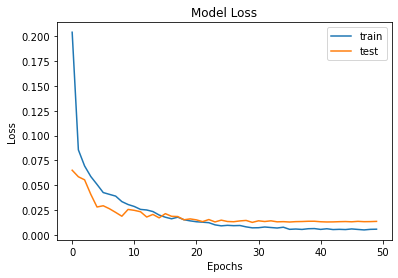

In [25]:
# Diagnostics
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

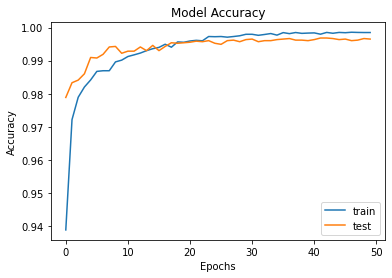

In [26]:
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
preds = np.argmax(model.predict(test), axis=1)
    
sub_df = {'ImageId':list(range(1, len(test) + 1)),'Label':preds}
submission = pd.DataFrame(sub_df).astype('int')
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [28]:
submission.to_csv('submission.csv', index=False)